In [2]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pyart
import xradar as xd
import glob

import warnings
warnings.filterwarnings("ignore")


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [3]:
files = ['/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.225146.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.230130.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.230148.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.231158.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.231216.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.232200.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.232219.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.233202.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.233241.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.234240.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.234258.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.235242.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.235301.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.000000.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.000244.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.000303.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.001246.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.001304.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.002248.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.002306.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.003250.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.003308.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.004230.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.005206.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.005225.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.010208.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.010226.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.011211.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.011229.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.012213.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.012231.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.013212.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.013230.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.014214.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.014233.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.015216.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.015234.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.020218.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.020237.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.021221.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.021251.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.022222.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.022241.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.023224.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.023242.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.024226.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.024244.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.025152.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.025211.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.030154.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.030213.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.031156.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.031215.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.032145.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.032203.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.033212.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.033230.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.034214.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.034232.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.035205.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.035223.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.040207.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.040225.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.041209.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.041227.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.042215.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.042233.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.043217.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.043235.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.044219.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.044237.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.045221.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.045239.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.050223.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.050241.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.051225.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.051244.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.052228.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.052246.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.053230.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.053248.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.054248.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.054307.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.055251.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.055309.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.060226.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.060244.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.061228.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.061246.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.062230.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.062249.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.063233.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.063251.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.064003.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.064947.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.065006.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.065949.nc',
'/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.070008.nc']

In [159]:
len(files)

98

In [149]:
files8 = sorted(glob.glob('/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250508.23*'))
files9 = sorted(glob.glob('/data/project/ARM_Summer_School_2025/bnf/bnfcsapr2cfrS3.a1/bnfcsapr2cfrS3.a1.20250509.[012345678]*'))
files = files8.extend(files9)

In [34]:
file = files[2]
dt = xd.io.open_cfradial1_datatree(file)

In [33]:
fig = plt.figure(figsize=[10, 10])
radar = pyart.xradar.Xradar(dt)

<Figure size 1000x1000 with 0 Axes>

In [37]:
fig = plt.figure(figsize=[10, 10])
display = pyart.graph.RadarMapDisplay(radar)

<Figure size 1000x1000 with 0 Axes>

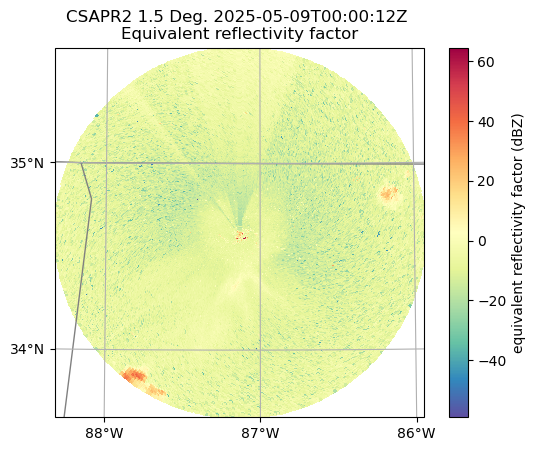

In [38]:
display.plot_ppi_map("uncorrected_reflectivity_h")

In [39]:
z_grid_limits = (500.,15_000.)
y_grid_limits = (-30_000.,30_000.)
x_grid_limits = (-30_000.,30_000.)

In [40]:
grid_resolution = 500

In [4]:
def compute_number_of_points(extent, resolution):
    return int((extent[1] - extent[0])/resolution)

In [43]:
z_grid_points = compute_number_of_points(z_grid_limits, grid_resolution)
x_grid_points = compute_number_of_points(x_grid_limits, grid_resolution)
y_grid_points = compute_number_of_points(y_grid_limits, grid_resolution)

In [44]:
grid = pyart.map.grid_from_radars([radar],
                                  grid_shape=(z_grid_points,
                                              y_grid_points,
                                              x_grid_points),
                                  grid_limits=(z_grid_limits,
                                               y_grid_limits,
                                               x_grid_limits),
                                 )
grid

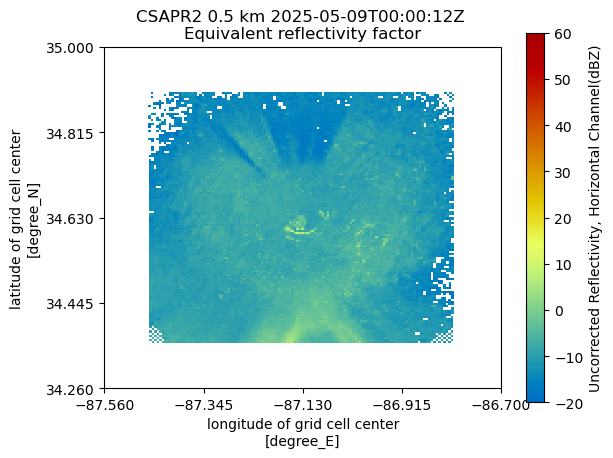

In [45]:
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid('uncorrected_reflectivity_h',
                  level=0,
                  vmin=-20,
                  vmax=60,
                  cmap='HomeyerRainbow')

In [5]:
def scan_to_grid(file):

    dt = xd.io.open_cfradial1_datatree(file)
    radar = pyart.xradar.Xradar(dt)
    
    z_grid_limits = (500.,15000.)
    y_grid_limits = (-120_000.,120_000.)
    x_grid_limits = (-120_000.,120_000.)
    grid_resolution = 1000
    
    z_grid_points = compute_number_of_points(z_grid_limits, grid_resolution)
    x_grid_points = compute_number_of_points(x_grid_limits, grid_resolution)
    y_grid_points = compute_number_of_points(y_grid_limits, grid_resolution)
    grid = pyart.map.grid_from_radars([radar],
                                  grid_shape=(z_grid_points,
                                              y_grid_points,
                                              x_grid_points),
                                  grid_limits=(z_grid_limits,
                                               y_grid_limits,
                                               x_grid_limits),
                                 )
    ds = grid.to_xarray()

    return ds

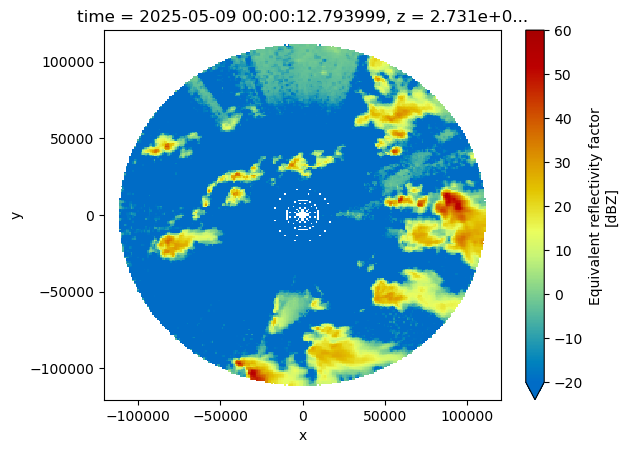

In [12]:
scan_to_grid(files[28]).isel(z=2).reflectivity.plot(cmap='HomeyerRainbow',
                                             vmin=-20,
                                             vmax=60);

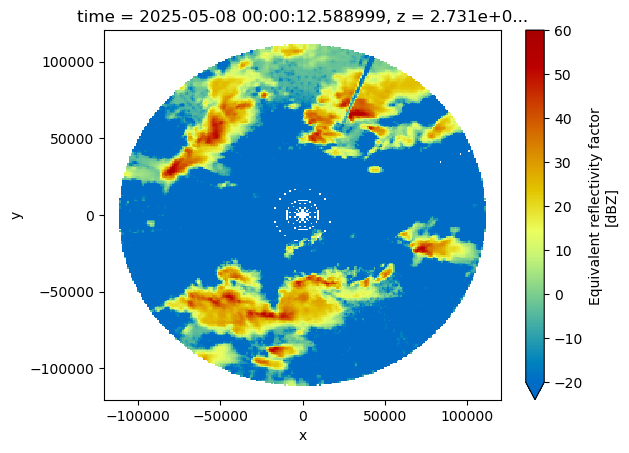

In [166]:
my_scan.isel(z=2).reflectivity.plot(cmap='HomeyerRainbow',
                                             vmin=-20,
                                             vmax=60);

In [17]:
file_num = 0
while (file_num <= len(files)):
    dt = xd.io.open_cfradial1_datatree(files[file_num])
    print(dt.scan_type)
    if(file_num == 12 or file_num == 21):
        file_num += 1
    else:
        file_num += 2

AttributeError: 'DataTree' object has no attribute 'scan_type'

In [196]:
grid_files = []
counter = 0
while (counter <= len(files)):
    grid_file = scan_to_grid(files[counter])
    grid_files.append(grid_file) 
    print('Frame ' + str(counter) + ' completed')
    if(counter == 12 || counter == 21):
        counter += 1
    else:
        counter += 2

Frame 0 completed
Frame 2 completed
Frame 4 completed
Frame 6 completed
Frame 8 completed
Frame 10 completed
Frame 12 completed
Frame 13 completed
Frame 15 completed
Frame 17 completed
Frame 19 completed
Frame 21 completed


TypeError: invalid values: Poorly formatted data: time/azimuth not included as core dimension.

In [175]:
grid_files[0].scan_name

'ppi'

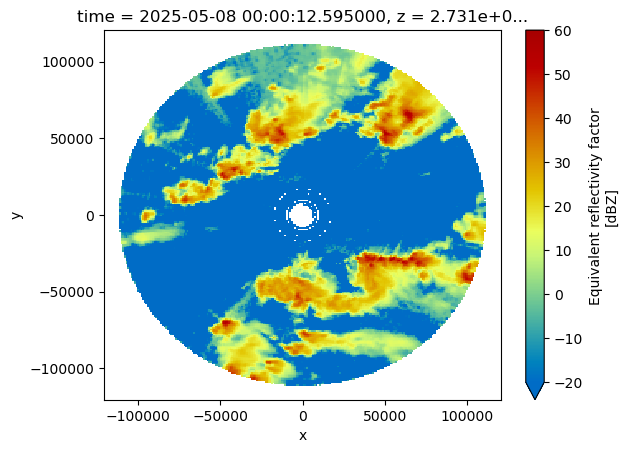

In [145]:
grid_files[5].isel(z=2).reflectivity.plot(cmap='HomeyerRainbow',
                                             vmin=-20,
                                             vmax=60);

In [202]:
dt = xd.io.open_cfradial1_datatree(files[90])
radar = pyart.xradar.Xradar(dt)

radar

<xarray.DataTree>
Group: /
│   Dimensions:              (sweep: 15)
│   Dimensions without coordinates: sweep
│   Data variables:
│       sweep_fixed_angle    (sweep) float32 60B 1.5 2.499 3.499 ... 26.0 33.0 42.0
│       sweep_group_name     (sweep) <U10 600B 'sweep_0.0' ... 'sweep_14.0'
│       time_coverage_end    |S22 22B b'2025-05-09T06:32:07Z'
│       time_coverage_start  |S22 22B b'2025-05-09T06:22:49Z'
│       volume_number        float64 8B 0.0
│       latitude             float32 4B 34.63
│       longitude            float32 4B -87.13
│       altitude             float32 4B 180.0
│   Attributes:
│       Conventions:      ARM-1.3 CF/Radial-1.4 instrument_parameters radar_param...
│       title:            ARM CSAPR2 Moments
│       institution:      U.S. Department of Energy Atmospheric Radiation Measure...
│       references:       See Instrument Handbook
│       comment:          
│       instrument_name:  CSAPR2
│       scan_name:        ppi
│       site_name:        bnfS3
│       source:           FROG 4.7.10:branch-4.7:muran-4.7.10:1001:mars-lxc-u20:2...
│       history:          created by user dsmgr on machine prod-proc3.adc.arm.gov...
├── Group: /sweep_0
│       Dimensions:                                                (azimuth: 360,
│                                                                   range: 1100)
│       Coordinates:
│           time                                                   (azimuth) datetime64[ns] 3kB ...
│         * range                                                  (range) float32 4kB ...
│         * azimuth                                                (azimuth) float32 1kB ...
│           elevation                                              (azimuth) float32 1kB ...
│           latitude                                               float32 4B ...
│           longitude                                              float32 4B ...
│           altitude                                               float32 4B ...
│       Data variables: (12/38)
│           time_offset                                            (azimuth) datetime64[ns] 3kB ...
│           attenuation_corrected_differential_reflectivity        (azimuth, range) float32 2MB ...
│           attenuation_corrected_differential_reflectivity_lag_1  (azimuth, range) float32 2MB ...
│           attenuation_corrected_reflectivity_h                   (azimuth, range) float32 2MB ...
│           censor_mask                                            (azimuth, range) int32 2MB ...
│           classification_mask                                    (azimuth, range) int32 2MB ...
│           ...                                                     ...
│           unthresholded_power_copolar_v                          (azimuth, range) float32 2MB ...
│           sweep_fixed_angle                                      float32 4B ...
│           nyquist_velocity                                       (azimuth) float32 1kB ...
│           prt                                                    (azimuth) float32 1kB ...
│           sweep_mode                                             <U6 24B 'sector'
│           sweep_number                                           float64 8B ...
├── Group: /sweep_1
│       Dimensions:                                                (azimuth: 360,
│                                                                   range: 1100)
│       Coordinates:
│           time                                                   (azimuth) datetime64[ns] 3kB ...
│         * range                                                  (range) float32 4kB ...
│         * azimuth                                                (azimuth) float32 1kB ...
│           elevation                                              (azimuth) float32 1kB ...
│           latitude                                               float32 4B ...
│           longitude                                              float32 4B ...
│           altitude    

In [184]:
dt

<xarray.DataTree>
Group: /
│   Dimensions:              (sweep: 15)
│   Dimensions without coordinates: sweep
│   Data variables:
│       sweep_fixed_angle    (sweep) float32 60B ...
│       sweep_group_name     (sweep) <U10 600B 'sweep_0.0' ... 'sweep_14.0'
│       time_coverage_end    |S22 22B ...
│       time_coverage_start  |S22 22B ...
│       volume_number        float64 8B ...
│       latitude             float32 4B ...
│       longitude            float32 4B ...
│       altitude             float32 4B ...
│   Attributes:
│       Conventions:      ARM-1.3 CF/Radial-1.4 instrument_parameters radar_param...
│       title:            ARM CSAPR2 Moments
│       institution:      U.S. Department of Energy Atmospheric Radiation Measure...
│       references:       See Instrument Handbook
│       comment:          
│       instrument_name:  CSAPR2
│       scan_name:        ppi
│       site_name:        bnfS3
│       source:           FROG 4.7.10:branch-4.7:muran-4.7.10:1001:mars-lxc-u20:2...
│       history:          created by user dsmgr on machine prod-proc3.adc.arm.gov...
├── Group: /sweep_0
│       Dimensions:                                                (azimuth: 360,
│                                                                   range: 1100)
│       Coordinates:
│           time                                                   (azimuth) datetime64[ns] 3kB ...
│         * range                                                  (range) float32 4kB ...
│         * azimuth                                                (azimuth) float32 1kB ...
│           elevation                                              (azimuth) float32 1kB ...
│           latitude                                               float32 4B ...
│           longitude                                              float32 4B ...
│           altitude                                               float32 4B ...
│       Data variables: (12/38)
│           time_offset                                            (azimuth) datetime64[ns] 3kB ...
│           attenuation_corrected_differential_reflectivity        (azimuth, range) float32 2MB ...
│           attenuation_corrected_differential_reflectivity_lag_1  (azimuth, range) float32 2MB ...
│           attenuation_corrected_reflectivity_h                   (azimuth, range) float32 2MB ...
│           censor_mask                                            (azimuth, range) int32 2MB ...
│           classification_mask                                    (azimuth, range) int32 2MB ...
│           ...                                                     ...
│           unthresholded_power_copolar_v                          (azimuth, range) float32 2MB ...
│           sweep_fixed_angle                                      float32 4B ...
│           nyquist_velocity                                       (azimuth) float32 1kB ...
│           prt                                                    (azimuth) float32 1kB ...
│           sweep_mode                                             <U6 24B 'sector'
│           sweep_number                                           float64 8B ...
├── Group: /sweep_1
│       Dimensions:                                                (azimuth: 360,
│                                                                   range: 1100)
│       Coordinates:
│           time                                                   (azimuth) datetime64[ns] 3kB ...
│         * range                                                  (range) float32 4kB ...
│         * azimuth                                                (azimuth) float32 1kB ...
│           elevation                                              (azimuth) float32 1kB ...
│           latitude                                               float32 4B ...
│           longitude                                              float32 4B ...
│           altitude                                               float32 4B ...
│       Data variabl